In [1]:
%matplotlib inline
import numpy as np
from numpy import loadtxt
from lmfit.models import ExponentialModel, ConstantModel
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


In [2]:
def red(time):
    '''
    This should eliminate the issue of the weird time jump about 2/3 of way through collection also that t=0 if 0 counts
    '''
    return np.arange(0,len(time))
def hours(secs,counts):
    import numpy
    hours=numpy.arange(0,secs[len(secs)-1]//3600+1)
    binned_counts=[0]*len(hours)
    for i in range(0,len(secs)):
        index=i//3600
        binned_counts[index]+=counts[i]
    return hours,binned_counts
def sin(x, amp,omega,shift,y0):
    """ model decaying sine wave, subtract data"""
    return amp * np.sin(x * omega + shift)+y0
def doFit(hour_time,binned_counts):
    from lmfit import Model
    gmod = Model(sin)
    params = gmod.make_params(amp=50, omega=.26,shift=0,y0=18800)
    params.add('omega',value=2*np.pi/24,vary=False)
    params.add('y0',value=np.average(binned_counts))
    result = gmod.fit(binned_counts,params,x=hour_time,weights=1/np.sqrt(binned_counts))

    print(result.fit_report())
    result.plot(fig_kws={'figsize':(10,10)})
    return result
def doFit2(time,rates):
    time,rates = filter(time,rates)
    hour_time,binned_counts=hours(red(time),rate)
    length = len(binned_counts)
    while binned_counts[length-1]<binned_counts[length-2]*.9:
        hour_time=hour_time[:-1]
        binned_counts=binned_counts[:-1]
        length = len(binned_counts)
        
    from lmfit import Model
    gmod = Model(sin)
    params = gmod.make_params(amp=50, omega=.26,shift=0,y0=18800)
    params.add('omega',value=2*np.pi/24,vary=False)
    params.add('y0',value=np.average(binned_counts))
    result = gmod.fit(binned_counts,params,x=hour_time,weights=1/np.sqrt(binned_counts))

    print(result.fit_report())
    result.plot(fig_kws={'figsize':(10,10)})
    return result,hour_time,binned_counts
def filter(time,rate):
    returnTime=[]
    returnRate=[]
    for i in range(len(time)):
        if time[i]!=0 and rate[i] == 0:
            continue
        else:
            returnTime.append(time[i])
            returnRate.append(rate[i])
    return returnTime,returnRate

[[Model]]
    Model(sin)
[[Fit Statistics]]
    # function evals   = 28
    # data points      = 38
    # variables        = 3
    chi-square         = 41.506
    reduced chi-square = 1.186
[[Variables]]
    amp:     95.3160251 +/- 35.24721 (36.98%) (init= 50)
    omega:   0.2617994 (fixed)
    shift:  -1.36886102 +/- 0.398203 (29.09%) (init= 0)
    y0:      20499.5272 +/- 26.36554 (0.13%) (init= 20506.68)
[[Correlations]] (unreported correlations are <  0.100)
    C(shift, y0)                 = -0.270 



(<lmfit.model.ModelResult at 0x7f276cfc2278>,
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [20231.0,
  20583.0,
  20098.0,
  20409.0,
  20127.0,
  20478.0,
  20528.0,
  20633.0,
  20581.0,
  20713.0,
  20628.0,
  20468.0,
  20625.0,
  20441.0,
  20726.0,
  20707.0,
  20574.0,
  20385.0,
  20741.0,
  20534.0,
  20466.0,
  20135.0,
  20346.0,
  20372.0,
  20373.0,
  20581.0,
  20580.0,
  20838.0,
  20510.0,
  20662.0,
  20572.0,
  20514.0,
  20455.0,
  20519.0,
  20560.0,
  20532.0,
  20495.0,
  20534.0])

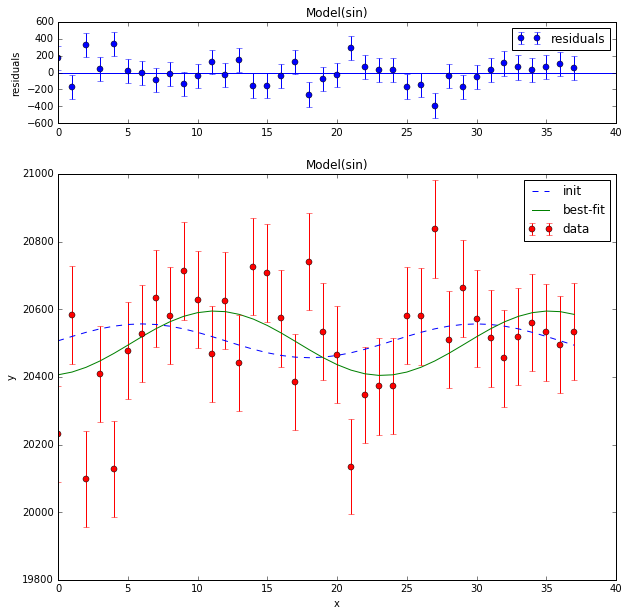

In [3]:
time, rate = np.loadtxt('Data/Luke_Ian/Luke_Perry_IanRate2015_12_08-13-33.txt', unpack=True)
doFit2(time,rate)

[[Model]]
    Model(sin)
[[Fit Statistics]]
    # function evals   = 34
    # data points      = 36
    # variables        = 3
    chi-square         = 61.458
    reduced chi-square = 1.862
[[Variables]]
    amp:     1182.12671 +/- 121.8304 (10.31%) (init= 50)
    omega:   0.2617994 (fixed)
    shift:   1.12308241 +/- 0.105020 (9.35%) (init= 0)
    y0:      1.3927e+05 +/- 88.96609 (0.06%) (init= 139410.6)
[[Correlations]] (unreported correlations are <  0.100)
    C(shift, y0)                 =  0.255 
    C(amp, y0)                   = -0.164 



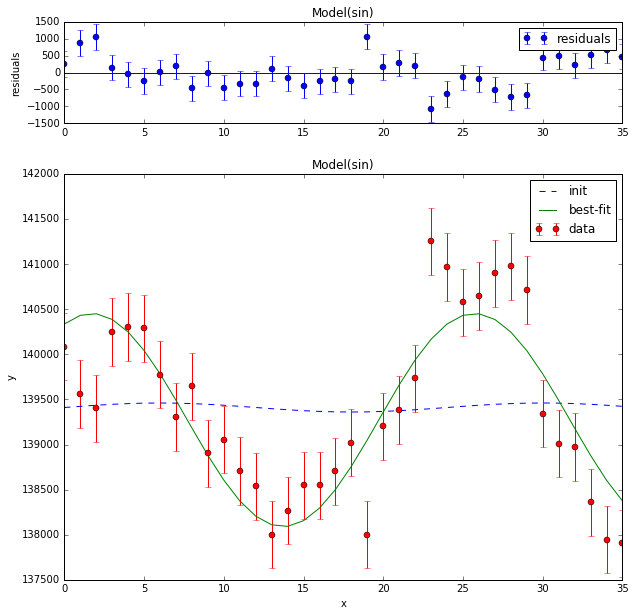

In [9]:
time, rate = np.loadtxt('Data/Luke_Ian/Luke_Perry_IanRate2015_12_03-13-02.txt', unpack=True)
a = doFit2(time,rate)

[[Model]]
    Model(sin)
[[Fit Statistics]]
    # function evals   = 29
    # data points      = 46
    # variables        = 3
    chi-square         = 293.633
    reduced chi-square = 6.829
[[Variables]]
    amp:     632.741572 +/- 186.8383 (29.53%) (init= 50)
    omega:   0.2617994 (fixed)
    shift:  -1.13140260 +/- 0.282549 (24.97%) (init= 0)
    y0:      1.1216e+05 +/- 129.2726 (0.12%) (init= 112196.9)
[[Correlations]] (unreported correlations are <  0.100)



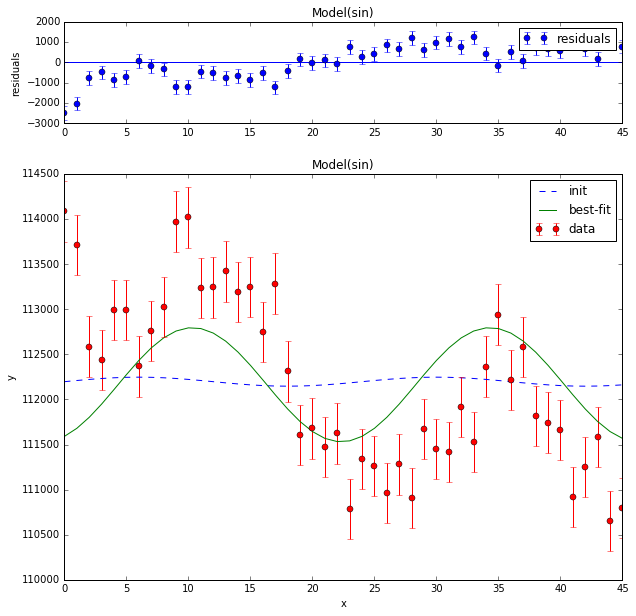

In [7]:
time,rate = np.loadtxt('Data/Corina_Ian_Thres208mVRate2015_11_05-13-33.txt', unpack=True)
a =doFit2(time,rate)

[[Model]]
    Model(sin)
[[Fit Statistics]]
    # function evals   = 27
    # data points      = 83
    # variables        = 3
    chi-square         = 172.274
    reduced chi-square = 2.153
[[Variables]]
    amp:    -24.3036239 +/- 31.37888 (129.11%) (init= 50)
    omega:   0.2617994 (fixed)
    shift:  -0.71871222 +/- 1.290198 (179.52%) (init= 0)
    y0:      18802.7045 +/- 22.27263 (0.12%) (init= 18803.54)
[[Correlations]] (unreported correlations are <  0.100)
    C(shift, y0)                 =  0.107 



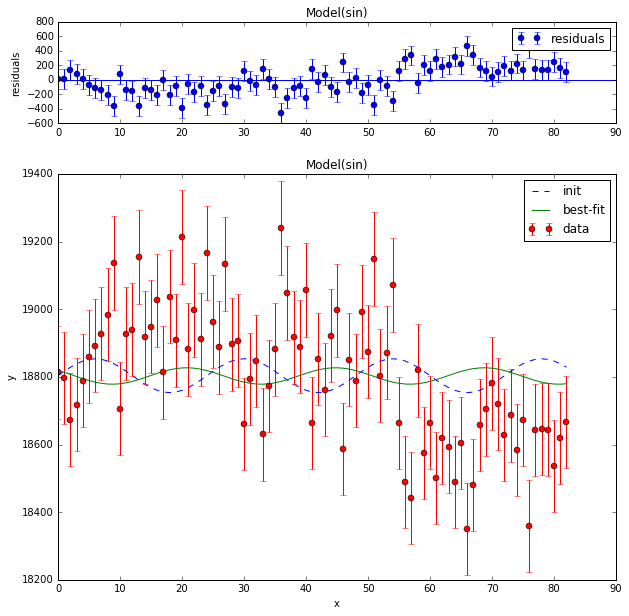

In [8]:
time,rate = np.loadtxt('Data/Corina_Ian_Thres400mVRate2015_11_09-01-48.txt', unpack=True)
a = doFit2(time,rate)

# Temperature Stuff

ValueError: x and y must have same first dimension

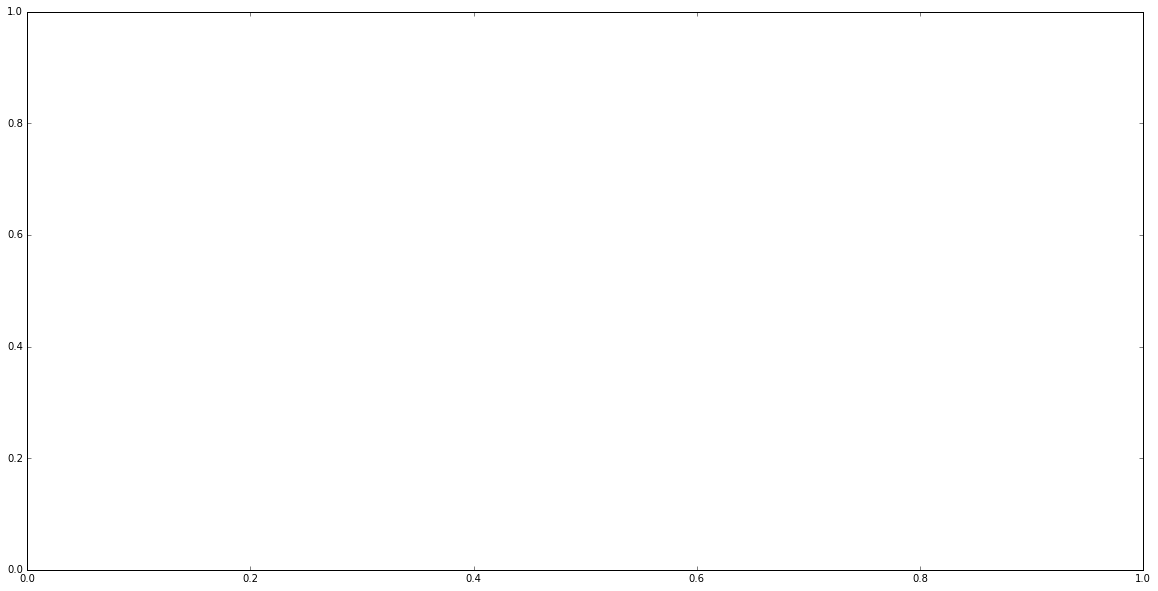

In [16]:
total_hours,total_temp = np.loadtxt('Data/binnedTemp.txt',unpack=True)


In [11]:
'''
#fname = 'Data/tempData.txt'
fname = 'Data/foo.txt'
f = open(fname)
f.readline()
days_hours=[]
days_temp =[]
#for i in range(564180//3600-1):
for i in range(24*3):   
    temp = np.empty([1])
    startDay = i
    endDay   = i+1
    print('hour: '+str(i))
    for i in range(3600*48*startDay,3600*48*endDay):
        line = f.readline()
        if line=='':
            continue

        if len(line.split('\t'))==2:
            temp = np.append(temp,float(line.split('\t')[1]))
    temp_hours,temp_red =hours(red(temp),temp)
    days_hours.append(temp_hours[:-1])
    days_temp.append(temp_red[:-1])
#print(temp)

'''


"\n#fname = 'Data/tempData.txt'\nfname = 'Data/foo.txt'\nf = open(fname)\nf.readline()\ndays_hours=[]\ndays_temp =[]\n#for i in range(564180//3600-1):\nfor i in range(24*3):   \n    temp = np.empty([1])\n    startDay = i\n    endDay   = i+1\n    print('hour: '+str(i))\n    for i in range(3600*48*startDay,3600*48*endDay):\n        line = f.readline()\n        if line=='':\n            continue\n\n        if len(line.split('\t'))==2:\n            temp = np.append(temp,float(line.split('\t')[1]))\n    temp_hours,temp_red =hours(red(temp),temp)\n    days_hours.append(temp_hours[:-1])\n    days_temp.append(temp_red[:-1])\n#print(temp)\n\n"

In [12]:
total_temp = []
total_hour = []
for i in range(len(days_temp)):
    for j in range(len(days_temp[i])):
        total_temp.append(days_temp[i][j])
        total_hour.append(days_hours[i][j])
        #print(days_hours[i][j])
total_temp=np.array(total_temp)/3600
total_hour=np.arange(len(total_temp))
plt.figure(figsize=(20,10))
plt.plot(total_hour,1)

TypeError: object of type 'numpy.float64' has no len()

[[Model]]
    Model(sin)
[[Fit Statistics]]
    # function evals   = 34
    # data points      = 36
    # variables        = 3
    chi-square         = 61.458
    reduced chi-square = 1.862
[[Variables]]
    amp:     1182.12671 +/- 121.8304 (10.31%) (init= 50)
    omega:   0.2617994 (fixed)
    shift:   1.12308241 +/- 0.105020 (9.35%) (init= 0)
    y0:      1.3927e+05 +/- 88.96609 (0.06%) (init= 139410.6)
[[Correlations]] (unreported correlations are <  0.100)
    C(shift, y0)                 =  0.255 
    C(amp, y0)                   = -0.164 

[[Model]]
    Model(sin)
[[Fit Statistics]]
    # function evals   = 28
    # data points      = 38
    # variables        = 3
    chi-square         = 41.506
    reduced chi-square = 1.186
[[Variables]]
    amp:     95.3160251 +/- 35.24721 (36.98%) (init= 50)
    omega:   0.2617994 (fixed)
    shift:  -1.36886102 +/- 0.398203 (29.09%) (init= 0)
    y0:      20499.5272 +/- 26.36554 (0.13%) (init= 20506.68)
[[Correlations]] (unreported correlati

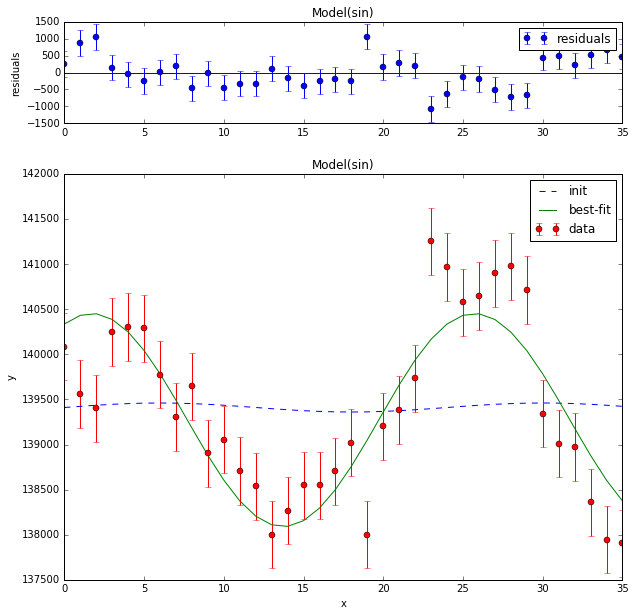

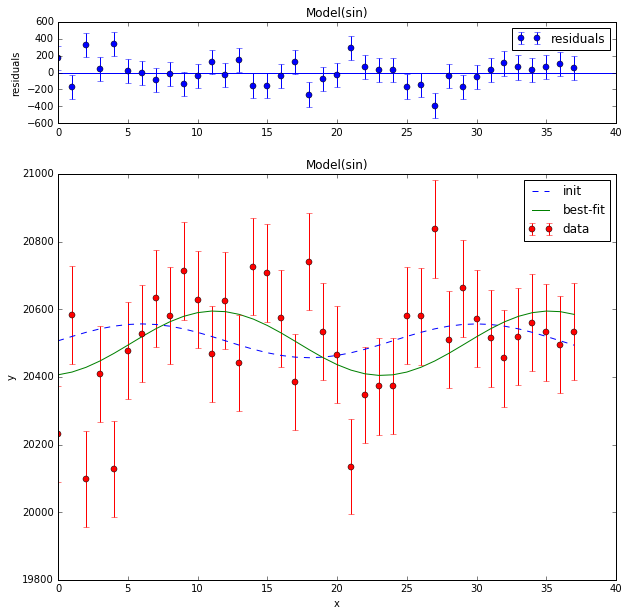

In [17]:
time, rate = np.loadtxt('Data/Luke_Ian/Luke_Perry_IanRate2015_12_03-13-02.txt', unpack=True)
out,hour_time,binned_counts=doFit2(time,rate)
time, rate = np.loadtxt('Data/Luke_Ian/Luke_Perry_IanRate2015_12_08-13-33.txt', unpack=True)
out_8,hour_time_8,binned_counts_8 = doFit2(time,rate)

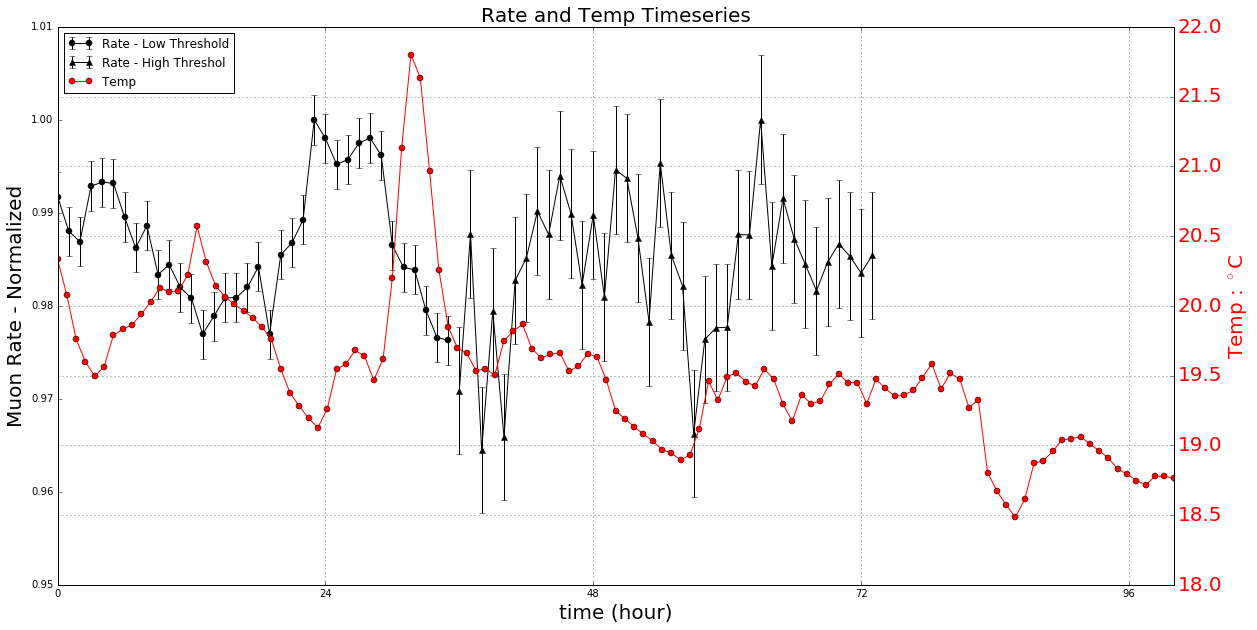

In [31]:
fig, ax1 = plt.subplots(figsize=(20,10))
fontSize=20
ax1.errorbar(hour_time,cor_counts, fmt='k-o',yerr=yerr1,label="Rate - Low Threshold")
ax1.errorbar(hour_time_8+36,cor_counts_8, fmt='k^-',yerr=yerr8,label="Rate - High Threshol")
ax1.set_xlabel('time (hour)',fontsize=fontSize)
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Muon Rate - Normalized',fontsize=fontSize)
for tl in ax1.get_yticklabels():
    tl.set_color('k')
ax1.set_xlim([0,100])
ax1.legend()
ax2 = ax1.twinx()
ax2.plot(total_hours, total_temp, 'r-o',label='Temp')
ax2.set_ylabel('Temp '+r': $^\circ$'+'C',fontsize=fontSize,color='r')
ax2.tick_params(axis='y', labelsize=fontSize)


for tl in ax2.get_yticklabels():
    tl.set_color('r')
ax2.set_xlim([0,100])
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=2)
ax1.xaxis.grid()
ax2.grid()
plt.xticks(np.arange(0, 126+1, 24))
plt.title('Rate and Temp Timeseries',fontsize=fontSize)
plt.show()

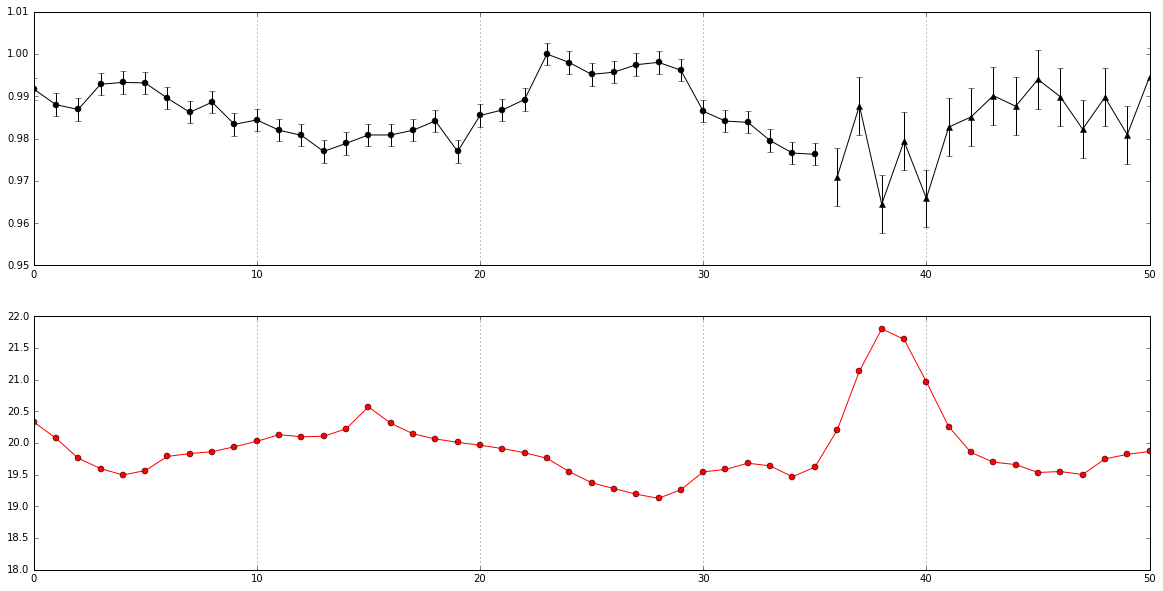

In [30]:
plt.subplots_adjust(hspace=0,wspace=0.)
plt.figure(figsize=(20,10))
ax1=plt.subplot(211)
ax1.errorbar(hour_time,cor_counts, fmt='k-o',yerr=yerr1,label="Rate - Low Threshold")
ax1.errorbar(hour_time_8+36,cor_counts_8, fmt='k^-',yerr=yerr8,label="Rate - High Threshold")
ax1.xaxis.grid()
ax2=plt.subplot(212,sharex=ax1)
ax2.plot(total_hours, total_temp, 'r-o',label='Temp')
ax2.set_xlim([0,50])
ax2.xaxis.grid()

plt.show()

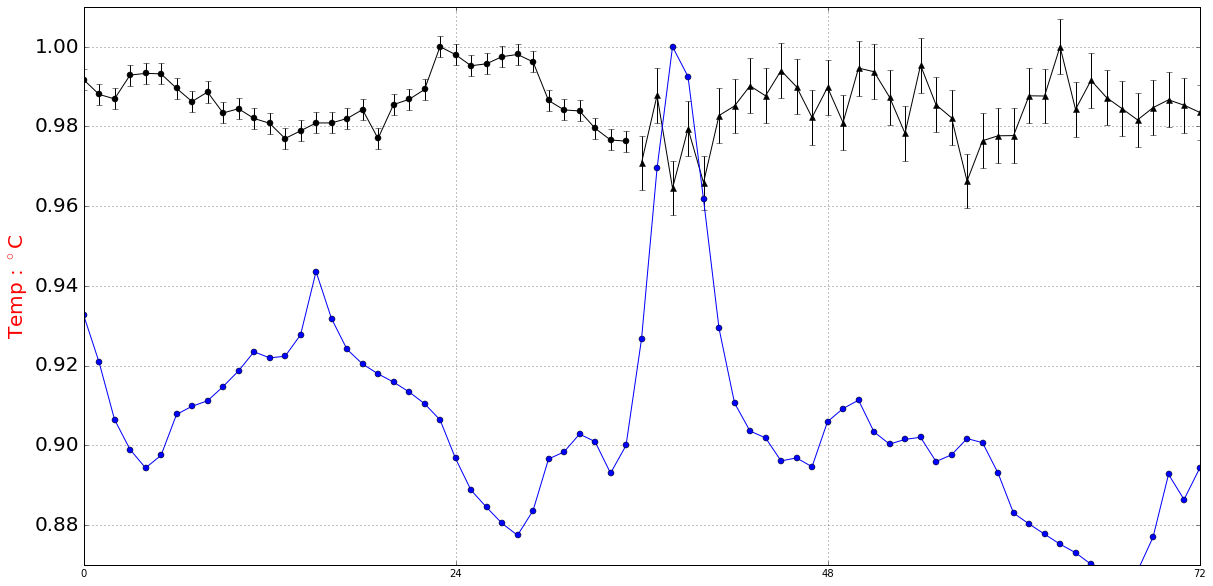

In [28]:
plt.figure(figsize=(20,10))
plt.errorbar(hour_time,cor_counts, fmt='k-o',yerr=yerr1,label="Rate - Low Threshold")
plt.errorbar(hour_time_8+36,cor_counts_8, fmt='k^-',yerr=yerr8,label="Rate - High Threshold")

plt.plot(total_hours,normalize(total_temp,1)[0],'b-o')
plt.xlim([0,50])
plt.ylim([.87,1.01])
plt.grid()
plt.xticks(np.arange(0, 80+1, 24))
plt.ylabel('Temp '+r': $^\circ$'+'C',fontsize=fontSize,color='r')
plt.tick_params(axis='y', labelsize=fontSize)
plt.show()

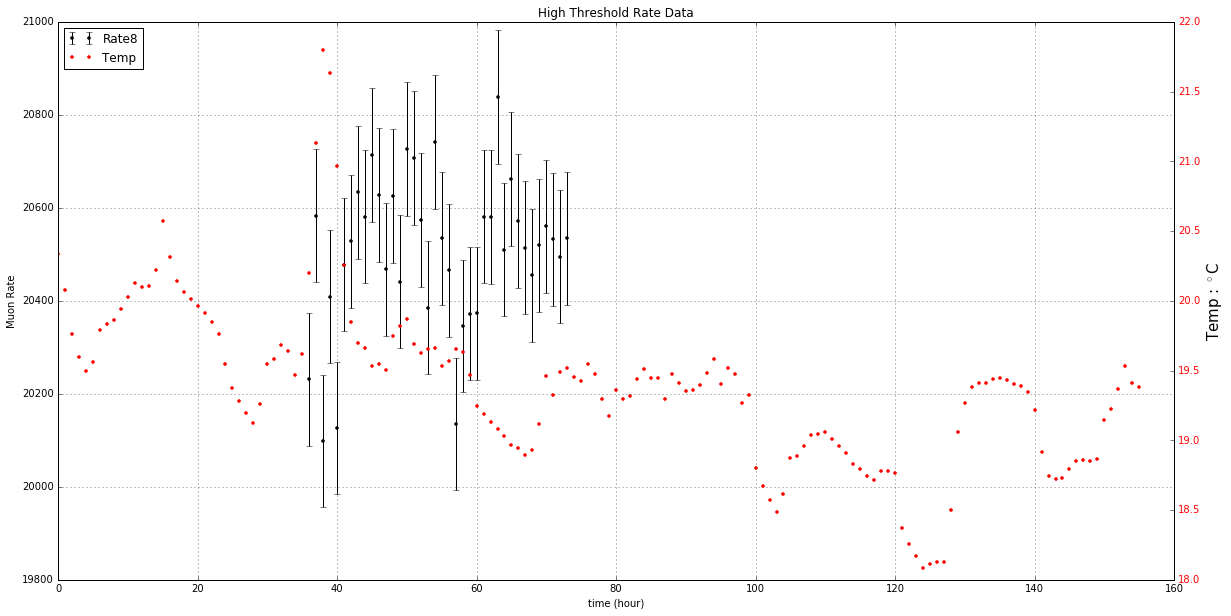

In [29]:
fig, ax1 = plt.subplots(figsize=(20,10))

ax1.errorbar(hour_time_8+36,binned_counts_8, fmt='k.',yerr=np.sqrt(binned_counts_8),label="Rate8")
ax1.set_xlabel('time (hour)')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Muon Rate')
for tl in ax1.get_yticklabels():
    tl.set_color('k')
ax1.legend()
ax2 = ax1.twinx()
ax2.plot(total_hours, total_temp, 'r.',label='Temp')
ax2.set_ylabel('Temp '+r': $^\circ$'+'C',fontsize=15)
for tl in ax2.get_yticklabels():
    tl.set_color('r')
#ax2.set_xlim([50,100])
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=2)
ax1.grid()
plt.title('High Threshold Rate Data')

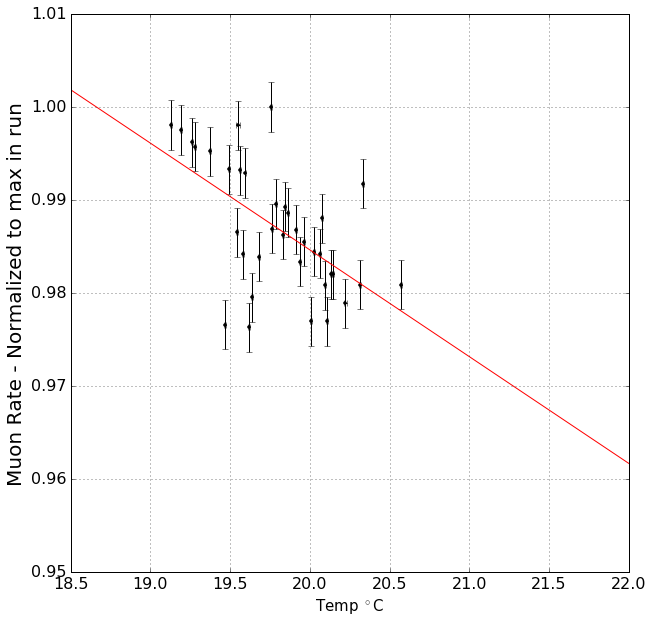

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # function evals   = 8
    # data points      = 36
    # variables        = 2
    chi-square         = 159.002
    reduced chi-square = 4.677
[[Variables]]
    slope:      -0.01147674 +/- 0.002808 (24.47%) (init=-0.0115128)
    intercept:   1.21415107 +/- 0.055605 (4.58%) (init= 1.214896)
[[Correlations]] (unreported correlations are <  0.100)
    C(slope, intercept)          = -1.000 



In [145]:
def normalize(rate,err):
    return rate/max(rate),err/max(rate)


cor_counts,yerr1=normalize(binned_counts,np.sqrt(binned_counts))

from lmfit.models import LinearModel
cor_mod = LinearModel()
pars = cor_mod.guess(cor_counts,x=total_temp[:len(cor_counts)])
cor_counts_8,yerr8=normalize(binned_counts_8,np.sqrt(binned_counts_8))
out = cor_mod.fit(cor_counts,pars,x=total_temp[:len(cor_counts)],weights=1./yerr1)
x_mod=np.linspace(18.5,22)
y_mod=cor_mod.eval(out.params,x=x_mod)

plt.figure(figsize=(10,10))
plt.errorbar(total_temp[:len(cor_counts)],cor_counts,fmt='k.',yerr=yerr1,
             xerr=np.array(tempDeviations).flatten()[0:len(cor_counts)])
plt.plot(x_mod,y_mod,'r-')
plt.xlabel('Temp'+r' $^\circ$'+'C',fontsize=15)
plt.ylabel('Muon Rate - Normalized to max in run',fontsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize-4)
plt.tick_params(axis='x', labelsize=fontSize-4)
plt.ylim([.95,1.01])
plt.grid()
plt.show()

print(out.fit_report())


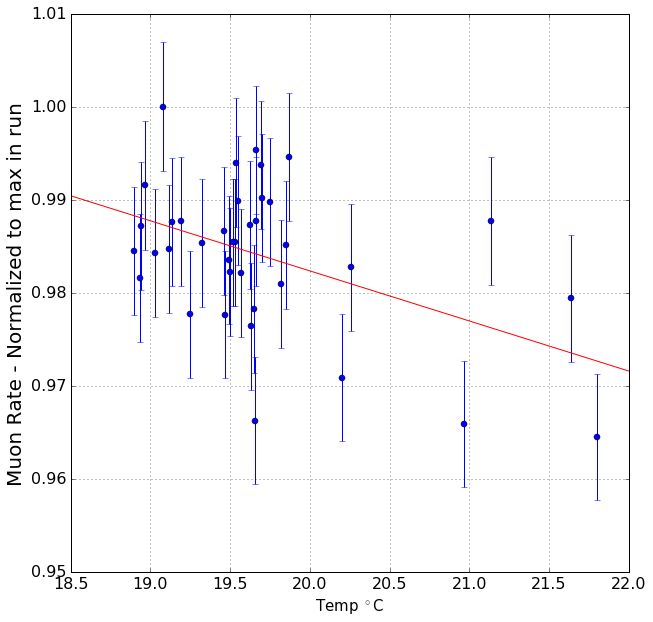

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # function evals   = 8
    # data points      = 38
    # variables        = 2
    chi-square         = 39.562
    reduced chi-square = 1.099
[[Variables]]
    slope:      -0.00538398 +/- 0.001730 (32.13%) (init=-0.0115128)
    intercept:   1.09003650 +/- 0.034080 (3.13%) (init= 1.214896)
[[Correlations]] (unreported correlations are <  0.100)
    C(slope, intercept)          = -0.999 



In [20]:
pars = cor_mod.guess(cor_counts,x=total_temp[:len(cor_counts)])
cor_counts_8,yerr8=normalize(binned_counts_8,np.sqrt(binned_counts_8))
out = cor_mod.fit(cor_counts_8,pars,x=total_temp[36:36+len(cor_counts_8)],weights=1./yerr8)
x_mod=np.linspace(18.5,22)
y_mod=cor_mod.eval(out.params,x=x_mod)

plt.figure(figsize=(10,10))
#plt.errorbar(total_temp[:len(cor_counts)],cor_counts,fmt='ko',yerr=yerr1)
plt.errorbar(total_temp[36:36+len(cor_counts_8)],cor_counts_8,fmt='bo',yerr=yerr8)
plt.plot(x_mod,y_mod,'r-')
plt.xlabel('Temp'+r' $^\circ$'+'C',fontsize=15)
plt.ylabel('Muon Rate - Normalized to max in run',fontsize=fontSize)
plt.ylim([.95,1.01])
plt.tick_params(axis='y', labelsize=fontSize-4)
plt.tick_params(axis='x', labelsize=fontSize-4)
plt.grid()
plt.show()

print(out.fit_report())


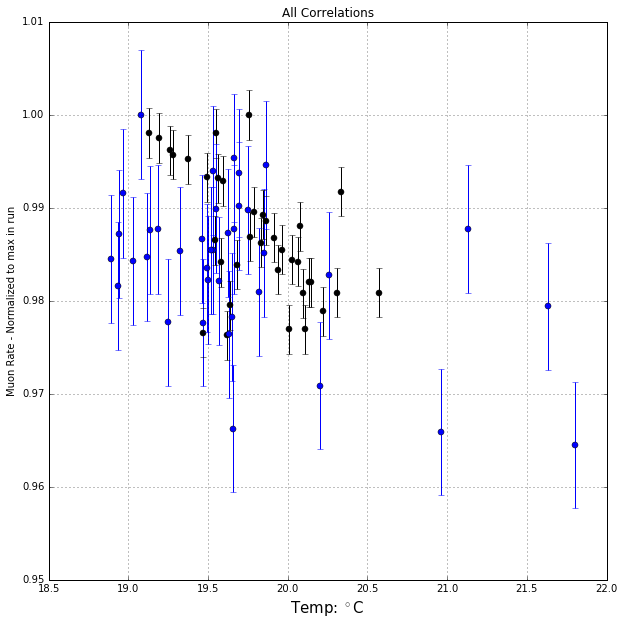

In [21]:
plt.figure(figsize=(10,10))
plt.errorbar(total_temp[:len(cor_counts)],cor_counts,fmt='ko',yerr=yerr1)
plt.errorbar(total_temp[36:36+len(cor_counts_8)],cor_counts_8,fmt='bo',yerr=yerr8)
#plt.plot(x_mod,y_mod,'r-')

plt.xlabel('Temp'+r': $^\circ$'+'C',fontsize=15)
plt.ylabel('Muon Rate - Normalized to max in run')
plt.title('All Correlations')

plt.grid()
plt.show()

In [ ]:
with open("Data/binnedTemp.txt", "w") as text_file:
    text_file.write("#Hours\tTemp(C)\n")
    for i in range(len(total_temp)):
        text_file.write(str(i)+'\t'+str(total_temp[i])+'\n')

In [ ]:
total_hours,total_temp = np.loadtxt('Data/binnedTemp.txt',unpack=True)

In [27]:
print(len(total_hours))
print(len(total_temp))
print(len(total_hour))

156
156
0


In [137]:

def hour_stndev(counts):
    from statistics import stdev,mean
    seconds=3600
    nHours = len(counts)//seconds
    print(nHours)
    print(len(counts))
    output_std=[0]*nHours
    output_temp=[0]*nHours
    for hour in range(nHours):
        temp=[]
        for sec in range(hour*seconds,(hour+1)*seconds):
            temp.append(counts[sec])
        output_std[hour]=stdev(temp)/np.sqrt(len(temp))
        output_temp[hour]=mean(temp)
    return np.arange(nHours),output_temp,output_std

In [138]:

fname = 'Data/tempData.txt'
f = open(fname)
f.readline()
days_hours=[]
days_temp =[]
tempDeviations=[]
for day in range(0,6):   
    temp = np.empty([1])
    print('Day: '+str(day))
    for i in range(3600*24*2*day,3600*24*2*(day+1)):
        line = f.readline()
        if line=='':
            continue
        if len(line.split('\t'))==2:
            temp = np.append(temp,float(line.split('\t')[1]))

    print(len(temp))
    #temp_hours,temp_red =hours(red(temp),temp)
    temp_hours,temp_red,temp_std=hour_stndev(temp)
    #days_hours.append(temp_hours[:-1])
    #days_temp.append(temp_red[:-1])
    days_hours.append(temp_hours)
    days_temp.append(temp_red)
    tempDeviations.append(temp_std)
f.close()
#print(temp)

Day: 0
86401
24
86401
Day: 1
86401
24
86401
Day: 2
86401
24
86401
Day: 3
86401
24
86401
Day: 4
86401
24
86401
Day: 5
86401
24
86401


In [139]:
print(len(np.array(tempDeviations).flatten()))
print(np.array(tempDeviations).flatten())


144
[ 0.00853124  0.00615292  0.00634421  0.00604929  0.00626198  0.0062678
  0.00610506  0.00615486  0.00619819  0.00612912  0.006067    0.00613443
  0.00611651  0.00591874  0.00711401  0.00670313  0.00597268  0.00602521
  0.00631385  0.00643213  0.00617252  0.006259    0.00615673  0.00632411
  0.01286893  0.00611919  0.00618905  0.00631731  0.00642115  0.00638305
  0.00628351  0.00608883  0.00628109  0.00633222  0.00616451  0.00613063
  0.0114118   0.00749649  0.006634    0.006806    0.00706053  0.00638715
  0.00630553  0.00618875  0.00631598  0.00618196  0.00605281  0.00630442
  0.01292866  0.00654032  0.00635849  0.00657512  0.00698854  0.00630707
  0.00612996  0.00670003  0.00638426  0.00618091  0.00632176  0.00648869
  0.00619413  0.00638986  0.00627233  0.00646242  0.00659226  0.00658693
  0.0066924   0.00656851  0.00673754  0.00727432  0.00630195  0.00670671
  0.01289565  0.00617359  0.00649909  0.00677009  0.00623501  0.00637037
  0.00680993  0.00649631  0.00624111  0.00676767

144


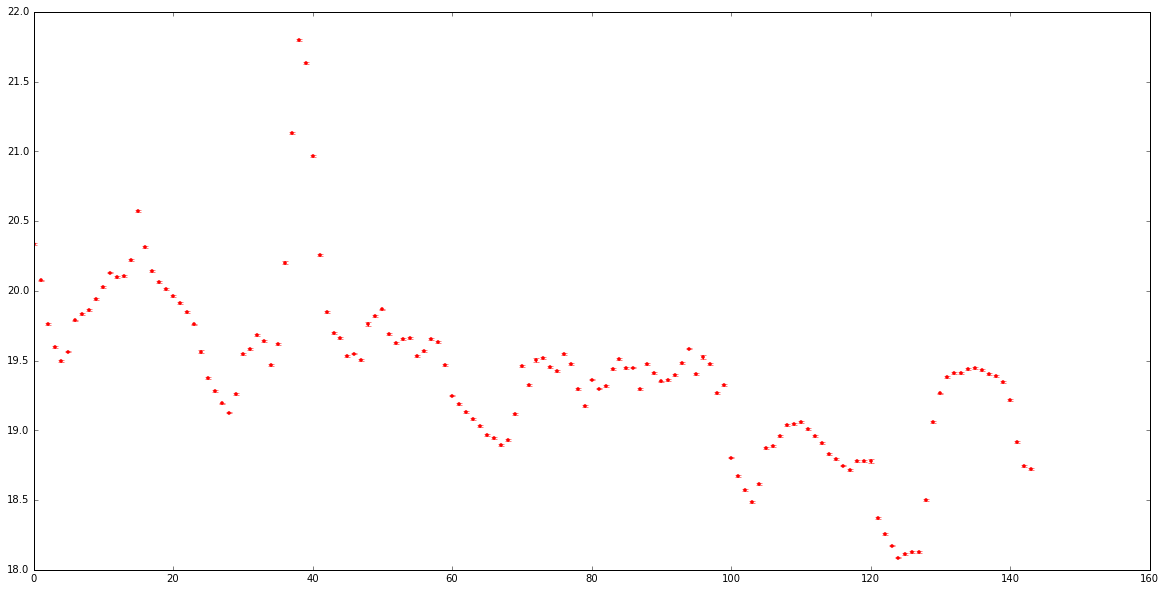

In [140]:
print(len(np.array(days_temp).flatten()))
temps=np.array(days_temp).flatten()
plt.figure(figsize=(20,10))
plt.errorbar(np.arange(0,len(temps)),temps,yerr=np.array(tempDeviations).flatten(),fmt='r.')
plt.show()


In [ ]:
def normalize(rate,err):
    return rate/max(rate),err/max(rate)


cor_counts,yerr1=normalize(binned_counts,np.sqrt(binned_counts))

from lmfit.models import LinearModel
cor_mod = LinearModel()
pars = cor_mod.guess(cor_counts,x=total_temp[:len(cor_counts)])
cor_counts_8,yerr8=normalize(binned_counts_8,np.sqrt(binned_counts_8))
out = cor_mod.fit(cor_counts,pars,x=total_temp[:len(cor_counts)],weights=1./yerr1)
x_mod=np.linspace(18.5,22)
y_mod=cor_mod.eval(out.params,x=x_mod)

plt.figure(figsize=(10,10))
plt.errorbar(total_temp[:len(cor_counts)],cor_counts,fmt='ko',yerr=yerr1)
plt.plot(x_mod,y_mod,'r-')
plt.xlabel('Temp'+r' $^\circ$'+'C',fontsize=15)
plt.ylabel('Muon Rate - Normalized to max in run',fontsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize-4)
plt.tick_params(axis='x', labelsize=fontSize-4)
plt.ylim([.95,1.01])
plt.grid()
plt.show()

print(out.fit_report())
